In [348]:
import numpy as np               
import pandas as pd 
import nltk
import string
import csv   

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [349]:
# - This package is large and takes some time to download, take the lighter version below.
# nltk.download()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [350]:
import pandas as pd
import csv  

reviews = pd.read_csv(
    'imdb_labelled.txt', 
    sep='\t', 
    header=None, 
    names=['Text', 'Sentiment'], 
    quoting=csv.QUOTE_NONE  
)

print(reviews.head())
print("-" * 30)
print(reviews['Sentiment'].unique())

                                                Text  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1
------------------------------
[0 1]


In [600]:
# ensure all reviews are correctly separated
# for comment in reviews['Text'] : 
#     print(comment) 
#     print( )


In [352]:

for scores in reviews['Sentiment'] : 
    if( scores != 0 and scores != 1 ) :
        print(scores) 
        print( )



In [353]:
print( len( reviews ) ) 

1000


In [354]:
reviews.shape

(1000, 2)

## ------------------------  Preperparation ------------------------

In [355]:
reviews['Sentiment'].value_counts()

Sentiment
0    500
1    500
Name: count, dtype: int64

In [356]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [357]:
#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

In [358]:
reviews.dtypes

Text         string[python]
Sentiment             int64
dtype: object

In [359]:
#get the review text for preprocessing
text = reviews['Text']
text[:3]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
Name: Text, dtype: string

In [360]:
for i in range(3):
    print(f"original Review: {text[i]}")
    print()

original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  

original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  

original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  



In [361]:
text1 = []
#remove punctuation
for review in text:
    review = review.translate(str.maketrans('', '', string.punctuation))  
    text1.append(review)
 
text1[:5]

['A very very very slowmoving aimless movie about a distressed drifting young man  ',
 'Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  ',
 'Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  ',
 'Very little music or anything to speak of  ',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head  ']

In [362]:
for i in range(3):
    print(f"Original Review: {reviews['Text'][i]}")
    print(f"Processed Review: {text1[i]}")
    print()
print(f"Original Review : {reviews['Text'][61]}")
print(f"Processed Review: {text1[61]}")

Original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Processed Review: A very very very slowmoving aimless movie about a distressed drifting young man  

Original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Processed Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  

Original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Processed Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  

Original Review : All in all I give this one a resounding 9 out of 10.  
Processed Review: All in all I give this one a resounding 9 out of 10  


In [601]:
freq = 0 
for i in range( len( text1 ) ):
    if text[i] != text1[i] : 
        freq += 1 
        print( i )
        # print(f"Original Review : {text[i]}")
        # print(f"Processed Review: {text1[i]}")
        # print()
print(f"Number of reviews changed after removing punctuation: {freq}")

Number of reviews changed after removing punctuation: 0


In [364]:
text1_2 = []
# remove digits/numbers
for review in text1:
    review = review.translate(str.maketrans('', '', string.digits))
    text1_2.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1[i]}")
    print(f"Processed Review: {text1_2[i]}")
    print()
print(f"Original Review : {text1[61]}")
print(f"Processed Review: {text1_2[61]}")

Original Review: A very very very slowmoving aimless movie about a distressed drifting young man  
Processed Review: A very very very slowmoving aimless movie about a distressed drifting young man  

Original Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
Processed Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  

Original Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  
Processed Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  

Original Review : All in all I give this one a resounding 9 out of 10  
Processed Review: All in all I give this one a resounding  out of   


In [602]:
freq = 0 
for i in range( len( text1_2 ) ):
    if text1[i] != text1_2[i] : 
        freq += 1 
        # print( i )
        # print(f"Original Review : {text1[i]}")
        # print(f"Processed Review: {text1_2[i]}")
        # print() 
print(f"Number of reviews changed after removing digits: {freq}")

Number of reviews changed after removing digits: 1000


In [366]:
text1_3 = []
#remove stop words
for review in text1_2:
    review_tokens = word_tokenize(review)
    filtered_review = [word for word in review_tokens if word.lower() not in stopwords.words('english')]
    text1_3.append(' '.join(filtered_review))
#     review = review.translate(str.maketrans('', '', string.digits))
#     text1_2.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1_2[i]}")
    print(f"Processed Review: {text1_3[i]}")
    print()
print(f"Original Review : {text1_2[61]}")
print(f"Processed Review: {text1_3[61]}")

Original Review: A very very very slowmoving aimless movie about a distressed drifting young man  
Processed Review: slowmoving aimless movie distressed drifting young man

Original Review: Not sure who was more lost  the flat characters or the audience nearly half of whom walked out  
Processed Review: sure lost flat characters audience nearly half walked

Original Review: Attempting artiness with black  white and clever camera angles the movie disappointed  became even more ridiculous  as the acting was poor and the plot and lines almost nonexistent  
Processed Review: Attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent

Original Review : All in all I give this one a resounding  out of   
Processed Review: give one resounding


In [603]:
freq = 0
for i in range( len( text1_3 ) ):
    if text1_2[i] != text1_3[i] : 
        freq += 1 
        # print( i )
        # print(f"Original Review : {text1_2[i]}")
        # print(f"Processed Review: {text1_3[i]}")
        # print()
print(f"Number of reviews changed after removing stop words: {freq}")   

Number of reviews changed after removing stop words: 1000


In [368]:
text1_4 = []
#change to lowercase
for review in text1_3:
    review = review.lower()
    #print(sentence)
    text1_4.append(review)

# print fisrt 3 processed reviews
for i in range(3):
    print(f"Original Review: {text1_3[i]}")
    print(f"Processed Review: {text1_4[i]}")
    print()
print(f"Original Review : {text1_3[61]}")
print(f"Processed Review: {text1_4[61]}")

Original Review: slowmoving aimless movie distressed drifting young man
Processed Review: slowmoving aimless movie distressed drifting young man

Original Review: sure lost flat characters audience nearly half walked
Processed Review: sure lost flat characters audience nearly half walked

Original Review: Attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent
Processed Review: attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent

Original Review : give one resounding
Processed Review: give one resounding


In [604]:
freq = 0
for i in range( len( text1_4 ) ):
    if text1_3[i] != text1_4[i] : 
        freq += 1 
        # print( i )
        # print(f"Original Review : {text1_3[i]}")
        # print(f"Processed Review: {text1_4[i]}")
        # print() 
print(f"Number of reviews changed after removing stop words: {freq}")

Number of reviews changed after removing stop words: 483


In [370]:
# finilaise the preprocessed text to text1_5. 
text1_5 = pd.Series(text1_4)
text1_5[:5]

0    slowmoving aimless movie distressed drifting y...
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [371]:
#apply lemmatising
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text2 = text1_5.apply(lambda x:' '.join(lemmatizer.lemmatize(w) for w in x.split()))
text2[:5] #notice that it does not do a good job

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    slowmoving aimless movie distressed drifting y...
1    sure lost flat character audience nearly half ...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene movie gerardo trying find song keep...
dtype: object

In [372]:
#apply lemmatising with POS tags

from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text1_5.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:5] #notice that it does a better job

0    slowmoving aimless movie distressed drift youn...
1    sure lose flat character audience nearly half ...
2    attempt artiness black white clever camera ang...
3                          little music anything speak
4    best scene movie gerardo try find song keep ru...
dtype: object

In [373]:
# #apply stemming
# ps = nltk.PorterStemmer()

# text4 = text1_5.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
# text4[:5]

In [374]:
reviews1 = list(zip(text3, label))

reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

,Review,Sentiment
0,slowmoving aimless movie distressed drift youn...,0
1,sure lose flat character audience nearly half ...,0
2,attempt artiness black white clever camera ang...,0
3,little music anything speak,0
4,best scene movie gerardo try find song keep ru...,1
...,...,...
995,get bore watch jessice lange take clothes,0
996,unfortunately virtue film production work lose...,0
997,word embarrass,0
998,exceptionally bad,0


In [375]:
# compare some original reviews and processed reviews (after lemmatising)
for i in range(3):
    print(f"Original Review: {reviews['Text'][i]}")
    print(f"Processed Review: {reviewsP['Review'][i]}")
    print()
print(f"Original Review : {reviews['Text'][61]}")
print(f"Processed Review: {reviewsP['Review'][61]}")

Original Review: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Processed Review: slowmoving aimless movie distressed drift young man

Original Review: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
Processed Review: sure lose flat character audience nearly half walk

Original Review: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
Processed Review: attempt artiness black white clever camera angle movie disappointed become even ridiculous act poor plot line almost nonexistent

Original Review : All in all I give this one a resounding 9 out of 10.  
Processed Review: give one resound


In [376]:
# compare with string before (remove to lowercase) lemmatising and after.
for i in range(3):
    print(f"Original Review: {text1_4[i]}")
    print(f"Processed Review: {reviewsP['Review'][i]}")
    print()
print(f"Original Review : {text1_4[61]}")
print(f"Processed Review: {reviewsP['Review'][61]}")

Original Review: slowmoving aimless movie distressed drifting young man
Processed Review: slowmoving aimless movie distressed drift young man

Original Review: sure lost flat characters audience nearly half walked
Processed Review: sure lose flat character audience nearly half walk

Original Review: attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent
Processed Review: attempt artiness black white clever camera angle movie disappointed become even ridiculous act poor plot line almost nonexistent

Original Review : give one resounding
Processed Review: give one resound


In [377]:
text_new_order = text.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))

In [605]:
freq = 0
for i in range( len( text1_4 ) ):
    if reviewsP['Review'][i] != text1_4[i] : 
        freq += 1 
        # print( i )
        # print(f"Original Review : {text1_4[i]}")
        # print(f"Processed Review: {reviewsP['Review'][i]}")
        # print()
print(f"Number of reviews changed after lemmatising: {freq}")

Number of reviews changed after lemmatising: 5


In [606]:
freq = 0
for i in range( 1000 ):
    if reviewsP['Review'][i] != reviews['Text'][i] : 
        freq += 1 
        # print( i )
print(f"Number of reviews changed after all pre-processing methods: {freq}")

Number of reviews changed after all pre-processing methods: 817


## ------------------------ Classification ------------------------

In [380]:
#transform text into BoW with count features
cv=CountVectorizer()

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

#see the features
cv.get_feature_names_out()

array(['aailiyah', 'abandon', 'ability', ..., 'zombie', 'zombiestudents',
       'zombiez'], dtype=object)

In [607]:
# print(cv_reviews)

In [382]:
cv_reviews.shape

(1000, 2626)

In [383]:
#to see the data in the typical tabular format
df =  pd.DataFrame(cv_reviews.toarray(), columns=cv.get_feature_names_out())
df.head()

,aailiyah,abandon,ability,abroad,absolutely,abstruse,abysmal,academy,accent,accessible,...,young,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [384]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
cv=CountVectorizer(max_features=10000)

#cv_reviews 
cv_reviews = cv.fit_transform(reviewsP['Review'])

cv_reviews.shape

(1000, 2626)

In [385]:
# Trasform text into Tfidf representations
tv=TfidfVectorizer()

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

print(tv.get_feature_names_out())

['aailiyah' 'abandon' 'ability' ... 'zombie' 'zombiestudents' 'zombiez']


In [386]:
tv_reviews.shape

(1000, 2626)

In [387]:
print(tv_reviews[0])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 2626)>
  Coords	Values
  (0, 2069)	0.4346406142946785
  (0, 49)	0.4346406142946785
  (0, 1492)	0.1600162800672412
  (0, 624)	0.4346406142946785
  (0, 653)	0.41021694639821593
  (0, 2616)	0.3684644103529951
  (0, 1393)	0.32189040762504656


In [388]:
#to filter by tf value and keep a certain number of features, use the max_features parameter
tv=TfidfVectorizer(max_features=10000)

#transformed train reviews
tv_reviews=tv.fit_transform(reviewsP['Review'])

tv_reviews.shape

(1000, 2626)

In [389]:
#get to top n features with the highest tf-idf 
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
    return feature_names[importance[:top_n]] 

print([get_top_tf_idf_words(tv_reviews,10)])

[array(['movie', 'film', 'bad', 'one', 'see', 'good', 'like', 'watch',
       'really', 'great'], dtype=object)]


In [390]:
df1 =  pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())

# df1
df1['movie'].describe()

count    1000.000000
mean        0.040069
std         0.093317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.598910
Name: movie, dtype: float64

<Axes: >

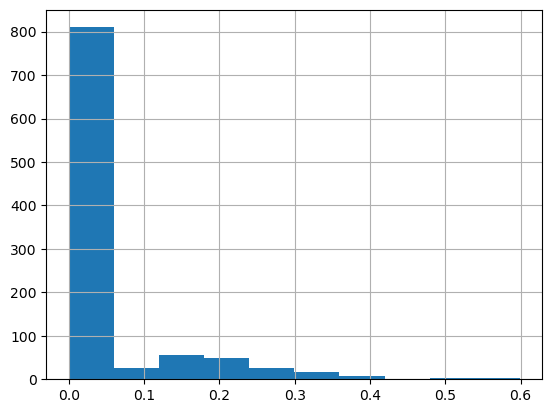

In [391]:
df1['movie'].hist()

In [392]:
df1['film'].describe()

count    1000.000000
mean        0.034760
std         0.084256
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.595308
Name: film, dtype: float64

## QUESTION 2 
Using the bag-of-words/terms representation, perform classification using 3 algorithms; present and discuss the results; compare the results of the 3 algorithm

In [409]:
import numpy as np               
import pandas as pd 
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [410]:
#text preprocessing (same as last week's lab)
reviews = pd.read_csv(
    'imdb_labelled.txt', 
    sep='\t', 
    header=None, 
    names=['Text', 'Sentiment'], 
    quoting=csv.QUOTE_NONE  
)
print("Dataset loaded successfully!")
reviews.head()


Dataset loaded successfully!


,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [411]:
reviews.shape


(1000, 2)

In [412]:
reviews['Sentiment'].value_counts()

Sentiment
0    500
1    500
Name: count, dtype: int64

In [413]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])


[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [414]:

#change the text column datatype to string
reviews = reviews.astype({'Text':'string'})

#get the review text for preprocessing
text = reviews['Text']
#text[:5]


In [415]:
text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))  
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)
    
 
#text1[:5]

In [416]:
text1 = pd.Series(text1)
#text1[:5]

In [417]:
#remove stop words
    
#Setting English stopwords
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
#text1[:5]

In [418]:
#apply stemming
# ps = nltk.PorterStemmer()

# text1 = text1.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
# text1[:5]

In [419]:
reviews1 = list(zip(text1, label))

In [420]:
reviews1[:3]

[('slowmoving aimless movie distressed drifting young man', 0),
 ('sure lost flat characters audience nearly half walked', 0),
 ('attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost nonexistent',
  0)]

In [421]:
reviewsP

,Review,Sentiment
0,slowmov aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1
...,...,...
995,got bore watch jessic lang take cloth,0
996,unfortun virtu film product work lost regrett ...,0
997,word embarrass,0
998,except bad,0


In [422]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance
reviewsP.head()

,Review,Sentiment
0,slowmov aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1


In [424]:
reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])

In [426]:
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

,index,Review,Sentiment
0,507,time film ended disliked despised,0
1,818,acting youd expect cast top notch,1
2,452,plot doesnt hang together acting absolutely ap...,0
3,368,felt though going ireland absolutely nothing w...,0
4,242,good intentions made film great film might one...,1


In [427]:
#split the dataset  

# #train dataset by splitting the data
# train_reviews = reviewsP1.Review[:1400]
# train_sentiments = reviewsP1.Sentiment[:1400]

# #test dataset
# test_reviews = reviewsP1.Review[1400:]
# test_sentiments = reviewsP1.Sentiment[1400:]

# print(train_reviews.shape,train_sentiments.shape)
# print(test_reviews.shape,test_sentiments.shape)

from sklearn.model_selection import train_test_split

# test_size=0.2 
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(
    reviewsP['Review'], 
    reviewsP['Sentiment'], 
    test_size=0.2, 
    random_state=42
)

print('Train shape:', train_reviews.shape)
print('Test shape:', test_reviews.shape)

Train shape: (800,)
Test shape: (200,)


In [428]:
train_reviews[0]

'slowmoving aimless movie distressed drifting young man'

In [429]:
#Count vectorizer for bag of words
#cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

#vocab=cv.get_feature_names_out() #toget feature names

BOW_cv_train: (800, 2629)
BOW_cv_test: (200, 2629)


In [430]:
print(cv_train_reviews[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 2629)>
  Coords	Values
  (0, 1177)	1
  (0, 943)	1


In [431]:
test_reviews.head()

521    watching washing machine twirling around would...
737             movie almost action scenes little comedy
740                                   saw film recommend
660    witty delightful adaptation dr seuss book bril...
411                                     role played well
Name: Review, dtype: object

In [432]:
#Tfidf vectorizer
#tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv=TfidfVectorizer()

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews = tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (800, 2629)
Tfidf_test: (200, 2629)


In [435]:
print(tv_train_reviews[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 2629)>
  Coords	Values
  (0, 1177)	0.7866263935286449
  (0, 943)	0.617429280974038


### classification

DT_bow accuracy : 0.625
DT_tfidf accuracy : 0.65
[[50 41]
 [34 75]] 

              precision    recall  f1-score   support

    Positive       0.60      0.55      0.57        91
    Negative       0.65      0.69      0.67       109

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200

[[57 34]
 [36 73]] 

              precision    recall  f1-score   support

    Positive       0.61      0.63      0.62        91
    Negative       0.68      0.67      0.68       109

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200

roc_auc_score for DT:  0.6480491985079141


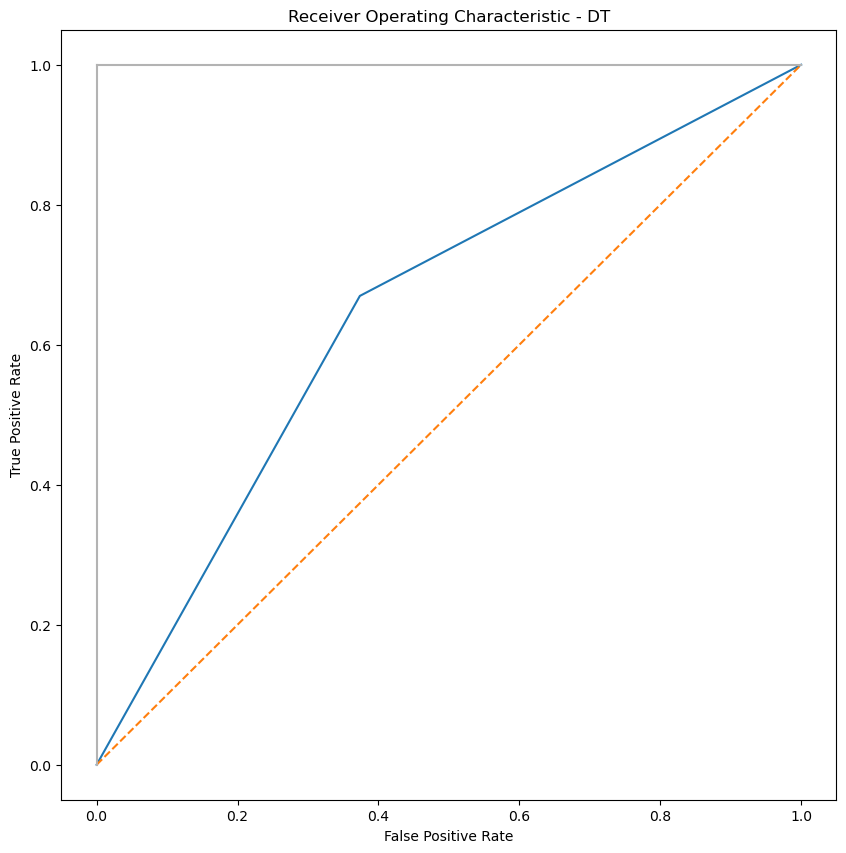

In [447]:
############################################
###           Decision Tree              ###
############################################
#training the model
DT=DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#Fitting the model for Bag of words
DT_bow=DT.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
DT_tfidf=DT.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
DT_bow_predict=DT.predict(cv_test_reviews)

##Predicting the model for tfidf features
DT_tfidf_predict=DT.predict(tv_test_reviews)

#Accuracy score for bag of words
DT_bow_score=accuracy_score(test_sentiments,DT_bow_predict)
print("DT_bow accuracy :",DT_bow_score)

#Accuracy score for tfidf features
DT_tfidf_score=accuracy_score(test_sentiments,DT_tfidf_predict)
print("DT_tfidf accuracy :",DT_tfidf_score)

#Classification report for bag of words 
DT_bow_report=classification_report(test_sentiments,DT_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_bow_predict), '\n')
print(DT_bow_report)

#Classification report for tfidf features
DT_tfidf_report=classification_report(test_sentiments,DT_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_tfidf_predict), '\n')
print(DT_tfidf_report)

#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT_tfidf_predict)
print('roc_auc_score for DT: ', roc_auc_score(test_sentiments, DT_tfidf_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

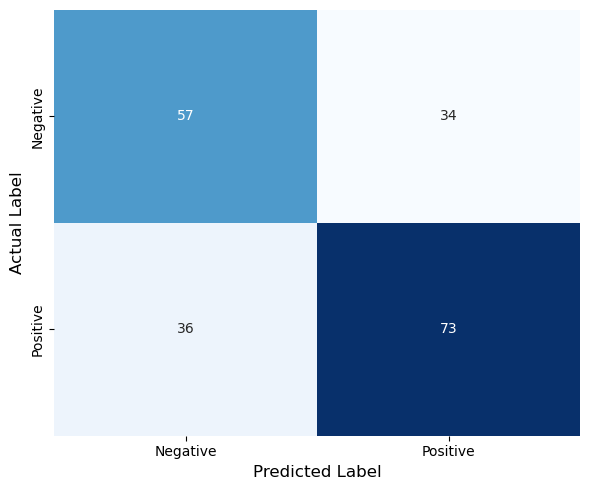

In [459]:

cm = confusion_matrix(test_sentiments, DT_tfidf_predict)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

# plt.title('Confusion Matrix - Decision Tree (TF-IDF)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()

In [444]:
############################################
###             Naive Bayes              ###
############################################

NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
NB_tfidf = NB.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)

#Predicting the model for tfidf features
NB_tfidf_predict = NB.predict(tv_test_reviews)

#Accuracy score for bag of words
NB_bow_score=accuracy_score(test_sentiments,NB_bow_predict)
print("NB_bow accuracy :",NB_bow_score)

#Accuracy score for tfidf features
NB_tfidf_score=accuracy_score(test_sentiments,NB_tfidf_predict)
print("NB_tfidf accuracy :",NB_tfidf_score)

#Classification report for bag of words 
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_bow_predict), '\n')
print(NB_bow_report)

#Classification report for tfidf features
NB_tfidf_report=classification_report(test_sentiments,NB_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_tfidf_predict), '\n')
print(NB_tfidf_report)

NB_bow accuracy : 0.765
NB_tfidf accuracy : 0.78
[[72 19]
 [28 81]] 

              precision    recall  f1-score   support

    Positive       0.72      0.79      0.75        91
    Negative       0.81      0.74      0.78       109

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200

[[72 19]
 [25 84]] 

              precision    recall  f1-score   support

    Positive       0.74      0.79      0.77        91
    Negative       0.82      0.77      0.79       109

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



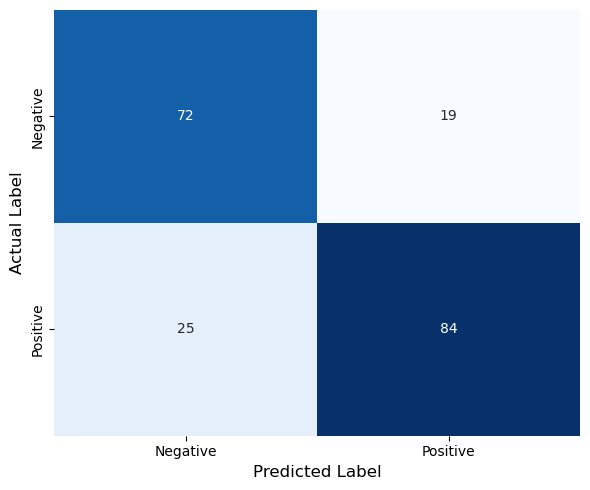

In [ ]:

cm = confusion_matrix(test_sentiments,NB_tfidf_predict)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

# plt.title('Confusion Matrix - Naive Bayes (TF-IDF)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()

In [439]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#Fitting the model for Bag of words
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
SVM_tfidf = SVM.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
SVM_bow_predict = SVM.predict(cv_test_reviews)

#Predicting the model for tfidf features
SVM_tfidf_predict = SVM.predict(tv_test_reviews)

#Accuracy score for bag of words
SVM_bow_score=accuracy_score(test_sentiments,SVM_bow_predict)
print("SVM_bow accuracy :",SVM_bow_score)

#Accuracy score for tfidf features
SVM_tfidf_score=accuracy_score(test_sentiments,SVM_tfidf_predict)
print("SVM_tfidf accuracy :",SVM_tfidf_score)

#Classification report for bag of words 
SVM_bow_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_bow_predict), '\n')
print(SVM_bow_report)

#Classification report for tfidf features
SVM_tfidf_report=classification_report(test_sentiments,SVM_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_tfidf_predict), '\n')
print(SVM_tfidf_report)

SVM_bow accuracy : 0.725
SVM_tfidf accuracy : 0.715
[[59 32]
 [23 86]] 

              precision    recall  f1-score   support

    Positive       0.72      0.65      0.68        91
    Negative       0.73      0.79      0.76       109

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

[[59 32]
 [25 84]] 

              precision    recall  f1-score   support

    Positive       0.70      0.65      0.67        91
    Negative       0.72      0.77      0.75       109

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



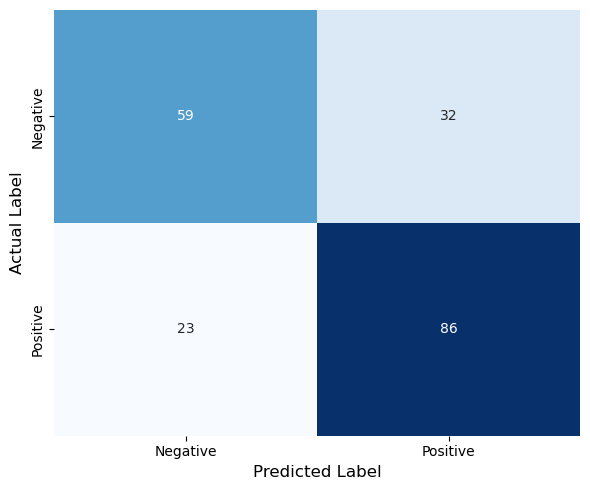

In [466]:

cm = confusion_matrix(test_sentiments, SVM_bow_predict)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

# plt.title('Confusion Matrix - SVM (BoW)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()

In [443]:
############################################
###                  k-NN                ###
############################################

kNN = KNeighborsClassifier(n_neighbors=7) # we can do trail and error to find the best k value, eg: 1 to 20. 

#Fitting the model for Bag of words
kNN_bow = kNN.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
kNN_tfidf = kNN.fit(tv_train_reviews,train_sentiments)

#Predicting the model for bag of words
kNN_bow_predict = kNN.predict(cv_test_reviews)

#Predicting the model for tfidf features
kNN_tfidf_predict = kNN.predict(tv_test_reviews)

#Accuracy score for bag of words
kNN_bow_score=accuracy_score(test_sentiments,kNN_bow_predict)
print("kNN_bow accuracy :",kNN_bow_score)

#Accuracy score for tfidf features
kNN_tfidf_score=accuracy_score(test_sentiments,kNN_tfidf_predict)
print("kNN_tfidf accuracy :",kNN_tfidf_score)

#Classification report for bag of words 
kNN_bow_report=classification_report(test_sentiments,kNN_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_bow_predict), '\n')
print(kNN_bow_report)

#Classification report for tfidf features
kNN_tfidf_report=classification_report(test_sentiments,kNN_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_tfidf_predict), '\n')
print(kNN_tfidf_report)

kNN_bow accuracy : 0.71
kNN_tfidf accuracy : 0.72
[[52 39]
 [19 90]] 

              precision    recall  f1-score   support

    Positive       0.73      0.57      0.64        91
    Negative       0.70      0.83      0.76       109

    accuracy                           0.71       200
   macro avg       0.72      0.70      0.70       200
weighted avg       0.71      0.71      0.70       200

[[ 44  47]
 [  9 100]] 

              precision    recall  f1-score   support

    Positive       0.83      0.48      0.61        91
    Negative       0.68      0.92      0.78       109

    accuracy                           0.72       200
   macro avg       0.76      0.70      0.70       200
weighted avg       0.75      0.72      0.70       200



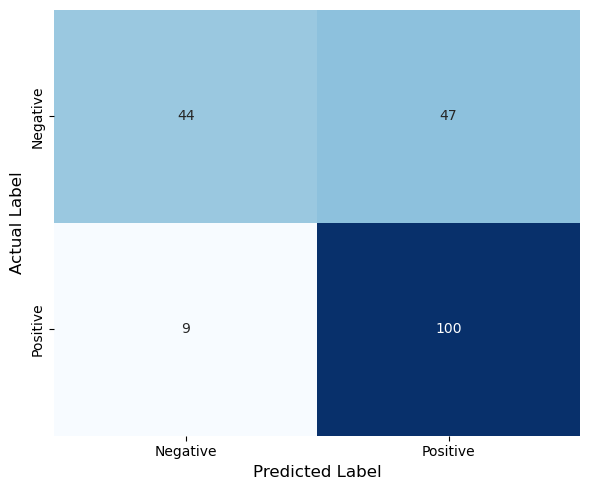

In [461]:

cm = confusion_matrix(test_sentiments,kNN_tfidf_predict)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

# plt.title('Confusion Matrix - k-NN (TF-IDF)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()

## question 3 
 Perform classification using a BERT-based model with fine-tuning and compare the results with the 3 algorithms from Task 2. 

In [467]:
import tensorflow as tf
import sys
print(f"Python version: {sys.version}")
print(f"TensorFlow version: {tf.__version__}")

Python version: 3.11.13 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:03:15) [MSC v.1929 64 bit (AMD64)]
TensorFlow version: 2.18.1


In [468]:
from transformers import BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_input = ['Hello world']

encoded_input = tokenizer(text_input, return_tensors='tf', padding=True, truncation=True)
print(encoded_input)


{'input_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[ 101, 7592, 2088,  102]])>, 'token_type_ids': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 1]])>}


In [469]:

import os
import shutil
os.environ["TF_USE_LEGACY_KERAS"] = "1"
import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text
# from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt


In [470]:
import pandas as pd
reviews = pd.read_csv(
    'imdb_labelled.txt', 
    sep='\t', 
    header=None, 
    names=['Text', 'Sentiment'], 
    quoting=csv.QUOTE_NONE  
)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [471]:
reviews.head()

,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [472]:
reviews.shape

(1000, 2)

In [473]:
reviews['Sentiment'].value_counts()

Sentiment
0    500
1    500
Name: count, dtype: int64

In [474]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Sentiment, dtype: int64


In [475]:
reviews1 = list(zip(reviews['Text'], label))

reviews1 = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviews1

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [476]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance

reviews1 = reviews1.sample(frac=1, random_state=1)
reviews1.reset_index(drop=True, inplace=True)


In [477]:
#may be worth shuffeling the data to prevent any ordering having an influence on the performance

reviews1 = reviews1.sample(frac=1, random_state=1)
reviews1.reset_index(drop=True, inplace=True)
reviews1.head()

,Review,Sentiment
0,"I saw it as a child on TV back in 1973, when i...",1
1,There's also enough hypocrisy in this film to ...,0
2,This is an excellent film.,1
3,I just cant explain this movie more than roman...,1
4,This is actually a very smart movie.,1


In [484]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(reviews1['Review'], reviews1['Sentiment'],
                                                     stratify=reviews1['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))



In [485]:

#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))


In [487]:
X_train 

85     This movie is so mind-bendingly awful, it coul...
283    It's the one movie that never ceases to intere...
786    It didn't make me scared, horrified, or make m...
114    The suspense builders were good, & just cross ...
766    Easily, none other cartoon made me laugh in a ...
                             ...                        
481    In particular the relationship between the bak...
783    Still it's quite interesting and entertaining ...
575          The music in the film is really nice too.  
363                 The script is horrendously stupid.  
381    So I am here to warn you--DO NOT RENT THIS MOV...
Name: Review, Length: 600, dtype: object

In [488]:
X_val

278    The fact is, this film is a wonderful, heartwa...
782    The acting by the whole cast could be put on a...
884            This movie totally grates on my nerves.  
463    Maybe there would be a reasonable explanation ...
801    I'm translating movies for a living and this i...
                             ...                        
203                 I wasn't the least bit interested.  
397       Worst hour and a half of my life!Oh my gosh!  
81      But even the talented Carrell can't save this.  
266    Just whatever you do, avoid "Groove" as its th...
50     Macbeth (Jason Connery) moved me to tears with...
Name: Review, Length: 200, dtype: object

In [489]:
X_test

770    It's hard not to fall head-over-heels in love ...
488                                     That was nice.  
115    The movie I received was a great quality film ...
489    Aailiyah was pretty good as Akasha, in places ...
373    This movie creates its own universe, and is fa...
                             ...                        
632    This is one I did not have, but I watched it r...
851                                 A bit predictable.  
328    I'm a big fan of this series mostly due to Ann...
668    About ten minutes into this film I started hav...
424    I guess I liked the details of his dysfunction...
Name: Review, Length: 200, dtype: object

In [493]:
#@title Choose a BERT model to fine-tune

#the model has 5 layers (L), 512 hidden size H and 8 attention heads
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [494]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

bert_model = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [495]:
reviews1['Review']

0      I saw it as a child on TV back in 1973, when i...
1      There's also enough hypocrisy in this film to ...
2                           This is an excellent film.  
3      I just cant explain this movie more than roman...
4                 This is actually a very smart movie.  
                             ...                        
995    Just consider the excellent story, solid actin...
996    This would not even be good as a made for TV f...
997     God, and I can never get that 90 minutes back!  
998    People who like European films and "art movies...
999    So mediocre in every aspect that it just becom...
Name: Review, Length: 1000, dtype: object

In [496]:
text_test = ["This was a superb episode, one of the best of both seasons. Down right horror for a change, with a story that is way way above the average MOH episodes, if there is such a thing. A man's wife is almost burned to death in a tragic car wreck, in which he was driving. His airbag worked, her's didn't. She is burned beyond recognition (great makeup btw), and not given much of a chance to live without a full skin graft. BUT, even in a coma, she keeps dying but brought back by modern technology, and when she does die for a few minutes, her ghost appears as a very vengeful spirit. Carnage of course ensues, and also some extremely gory killings, and also, some extremely sexy scenes. What more could you ask for, you might ask? Well, not much, because this baby has it all, and a very satirical ending, that should leave a smile on most viewers faces. I just loved Rob Schmidt's (Wrong Turn) direction too, he has a great knack for horror. Excellent episode, this is one I'm buying for sure.This was a superb episode, one of the best of both seasons."]

text_preprocessed = tokenizer(
    text_test, 
    padding='max_length', 
    truncation=True, 
    max_length=128, 
    return_tensors='tf'
)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_ids"].shape}')  
print(f'Word Ids   : {text_preprocessed["input_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["attention_mask"][0, :12]}') 
print(f'Type Ids   : {text_preprocessed["token_type_ids"][0, :12]}') 


Keys       : ['input_ids', 'token_type_ids', 'attention_mask']
Shape      : (1, 128)
Word Ids   : [  101  2023  2001  1037 21688  2792  1010  2028  1997  1996  2190  1997]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [497]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [498]:

bert_results = bert_model(
    input_ids=text_preprocessed['input_ids'],
    attention_mask=text_preprocessed['attention_mask'],
    token_type_ids=text_preprocessed['token_type_ids']
)

print(f'Loaded BERT Model')
print(f'Pooled Output Shape   : {bert_results.pooler_output.shape}')
print(f'Sequence Output Shape : {bert_results.last_hidden_state.shape}')
print(f'Pooled Output Values  : {bert_results.pooler_output[0, :12]}')

Loaded BERT Model
Pooled Output Shape   : (1, 768)
Sequence Output Shape : (1, 128, 768)
Pooled Output Values  : [-0.5325559  -0.4930593  -0.9486063   0.3342785   0.70734984 -0.13455886
  0.06491721  0.3782452  -0.88591117 -0.9999     -0.6565929   0.891923  ]


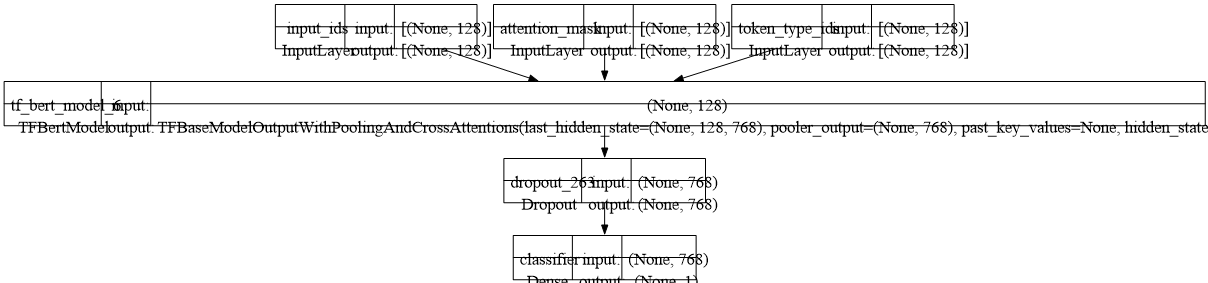

In [499]:
def build_classifier_model():
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
    token_type_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='token_type_ids')
    
    results = bert_model(
        input_ids=input_ids, 
        attention_mask=attention_mask, 
        token_type_ids=token_type_ids
    )
    
    pooled_output = results.pooler_output
    
    net = tf.keras.layers.Dropout(0.1)(pooled_output)
    
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    
    return tf.keras.Model(
        inputs=[input_ids, attention_mask, token_type_ids], 
        outputs=net
    )
classifier_model = build_classifier_model()

tf.keras.utils.plot_model(classifier_model, show_shapes=True, dpi=64)


In [500]:
from transformers import create_optimizer

epochs = 6
steps_per_epoch = 1200  
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)
init_lr = 3e-5

optimizer, schedule = create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=0.01
)

print(f"Optimizer created: {type(optimizer)}")
print(f"Total training steps: {num_train_steps}, Warmup steps: {num_warmup_steps}")

Optimizer created: <class 'transformers.optimization_tf.AdamWeightDecay'>
Total training steps: 7200, Warmup steps: 720


In [501]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                            

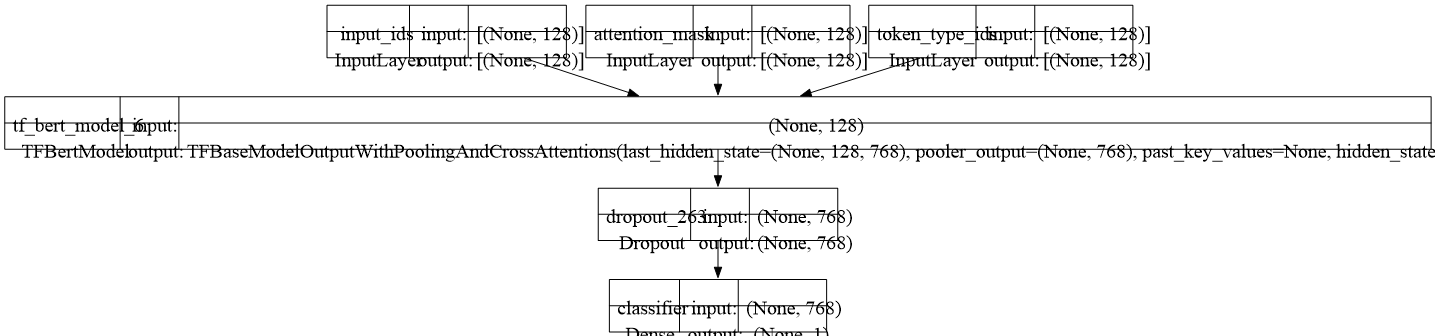

In [502]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [503]:

def preprocess_data(texts, labels, tokenizer, max_len=128):
    text_list = texts.tolist() if hasattr(texts, 'tolist') else list(texts)
    
    encoded = tokenizer(
        text_list,
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='tf'
    )
    
    x = {
        'input_ids': encoded['input_ids'],
        'attention_mask': encoded['attention_mask'],
        'token_type_ids': encoded['token_type_ids']
    }
    y = tf.convert_to_tensor(labels) if labels is not None else None
    
    return x, y

print("(Training Data)...")
x_train_processed, y_train_processed = preprocess_data(X_train, y_train, tokenizer)

print("(Validation Data)...")
x_val_processed, y_val_processed = preprocess_data(X_val, y_val, tokenizer)

print("Completed preprocessing.")

(Training Data)...
(Validation Data)...
Completed preprocessing.


In [504]:
import tensorflow as tf

print("Creating dummy input for warm-up...")
dummy_text = ["This is a warm-up sentence to initialize model weights."]
dummy_input = tokenizer(
    dummy_text, 
    padding='max_length', 
    truncation=True, 
    max_length=128, 
    return_tensors='tf'
)
try:
    print("warmup BERT model...")
    bert_model(
        input_ids=dummy_input['input_ids'],
        attention_mask=dummy_input['attention_mask'],
        token_type_ids=dummy_input['token_type_ids']
    )
    print("BERT model variables initialized successfully!")
except Exception as e:
    print(f"Warning or error occurred during warm-up: {e}")

Creating dummy input for warm-up...
warmup BERT model...
BERT model variables initialized successfully!


In [505]:
classifier_model = build_classifier_model()

classifier_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.metrics.BinaryAccuracy()]
)

print("model built and compiled.")

model built and compiled.


In [506]:
print(f'Training model with BERT (Hugging Face version)...')

history = classifier_model.fit(
    x=x_train_processed,
    y=y_train_processed,
    validation_data=(x_val_processed, y_val_processed),
    epochs=epochs,
    batch_size=16  
)

Training model with BERT (Hugging Face version)...
Epoch 1/6
38/38 [==============================] - 232s 5s/step - loss: 1.0568 - binary_accuracy: 0.5000 - val_loss: 0.9071 - val_binary_accuracy: 0.5000
Epoch 2/6
38/38 [==============================] - 203s 5s/step - loss: 0.7532 - binary_accuracy: 0.5150 - val_loss: 0.6335 - val_binary_accuracy: 0.5600
Epoch 3/6
38/38 [==============================] - 210s 6s/step - loss: 0.6214 - binary_accuracy: 0.6100 - val_loss: 0.4895 - val_binary_accuracy: 0.7600
Epoch 4/6
38/38 [==============================] - 231s 6s/step - loss: 0.3570 - binary_accuracy: 0.8383 - val_loss: 0.2257 - val_binary_accuracy: 0.9250
Epoch 5/6
38/38 [==============================] - 206s 5s/step - loss: 0.1691 - binary_accuracy: 0.9417 - val_loss: 0.2068 - val_binary_accuracy: 0.9350
Epoch 6/6
38/38 [==============================] - 328s 9s/step - loss: 0.0989 - binary_accuracy: 0.9750 - val_loss: 0.2061 - val_binary_accuracy: 0.9400


Keys: dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


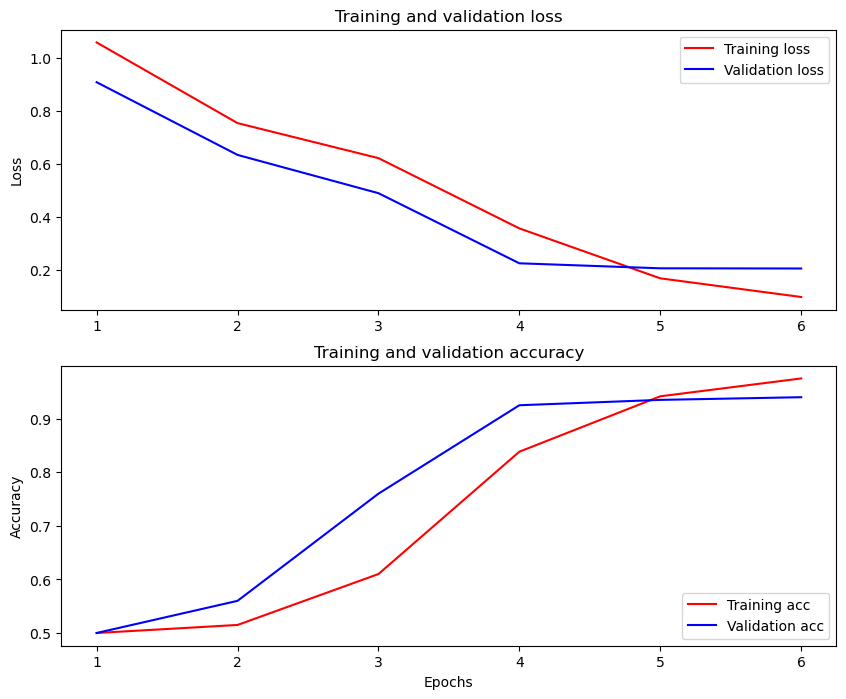

In [507]:
import matplotlib.pyplot as plt

history_dict = history.history
print("Keys:", history_dict.keys())

acc_key = 'binary_accuracy' if 'binary_accuracy' in history_dict else 'accuracy'
val_acc_key = 'val_' + acc_key

acc = history_dict[acc_key]
val_acc = history_dict[val_acc_key]
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_range = range(1, len(acc) + 1)

fig = plt.figure(figsize=(10, 8)) 
fig.tight_layout()

# --- 1: Loss ---
plt.subplot(2, 1, 1)
plt.plot(epochs_range, loss, 'r', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

# --- 2: Accuracy ---
plt.subplot(2, 1, 2)
plt.plot(epochs_range, acc, 'r', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [508]:

x_test_processed, y_test_processed = preprocess_data(X_test, y_test, tokenizer)

print("evaluating...")
loss, accuracy = classifier_model.evaluate(x_test_processed, y_test_processed)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

evaluating...
7/7 [==============================] - 12s 2s/step - loss: 0.2584 - binary_accuracy: 0.9100
Loss: 0.258394718170166
Accuracy: 0.9100000262260437


In [509]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_test_processed, y_test_processed = preprocess_data(X_test, y_test, tokenizer)
#predicted values using the model
y_pred=classifier_model.predict(X_test_processed)

print(y_pred.flatten())

7/7 [==============================] - 20s 2s/step
[ 1.9330782   3.5178208   3.7368872   3.4867704   3.6602535   3.4886982
 -3.6241443  -3.6644819  -2.7479393   3.7236614  -1.7880967  -3.3156414
 -2.8953974  -3.395192   -2.9296825  -2.3450153   3.365863    3.0654368
 -2.9263628  -2.603559    3.6007392   3.8822136  -3.400464    3.8476129
  3.7895215  -3.098578   -2.3303702  -2.777416    3.4352057  -3.6154628
  3.8617013   3.630555   -0.497894   -3.7019618   4.0291815  -3.035592
  3.8327267  -3.6446462   3.462104    3.9997442  -1.8411522  -2.9670045
 -3.5182962   3.4665272   3.794104   -3.5637152   3.7582223  -3.693765
 -3.432548   -1.3823926   3.615025   -3.6343865  -3.6345098  -2.0505729
  3.5725443  -3.3849292  -3.5712078   3.514549    2.7758214   3.7589817
 -3.6496842  -2.790728    3.8055112  -3.2729084   3.6771765   3.6728604
  3.798652   -3.169892    4.016857    2.433937   -1.8741008   3.5640433
 -3.1646426   3.8419363  -1.6849103  -3.7266736  -3.3326566   4.1173644
  3.6876314   3

In [510]:
#len(y_pred)

for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1

print(y_pred.flatten())

[1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1.]


In [511]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[94  6]
 [12 88]] 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       100
           1       0.94      0.88      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Accuracy: 0.91
AUC: 0.9099999999999999


770    1
488    1
115    1
489    1
373    1
      ..
632    0
851    0
328    1
668    0
424    1
Name: Sentiment, Length: 200, dtype: int64


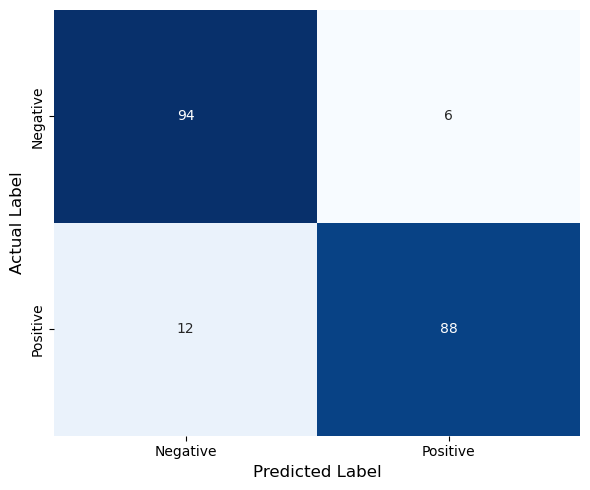

In [514]:

cm = confusion_matrix(y_test, y_pred)
print(y_test)
plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

# plt.title('Confusion Matrix -BERT', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.show()

## QUESTION 4
Perform topic detection using 1 algorithm using 10 as the parameter for the number of topics; present and discuss each topic, and assess the quality of the detected topics. 

In [515]:
import numpy as np
import pandas as pd
import nltk
import string

In [516]:
reviews = pd.read_csv(
    'imdb_labelled.txt', 
    sep='\t', 
    header=None, 
    names=['Text', 'Sentiment'], 
    quoting=csv.QUOTE_NONE  
)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [517]:
reviews.head()


,Text,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [518]:
reviews.shape

(1000, 2)

In [519]:
# Create a new column containing the length each review
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

In [520]:
print("The longest review has: {} words".format(reviews.Text_len.max()))

The longest review has: 71 words


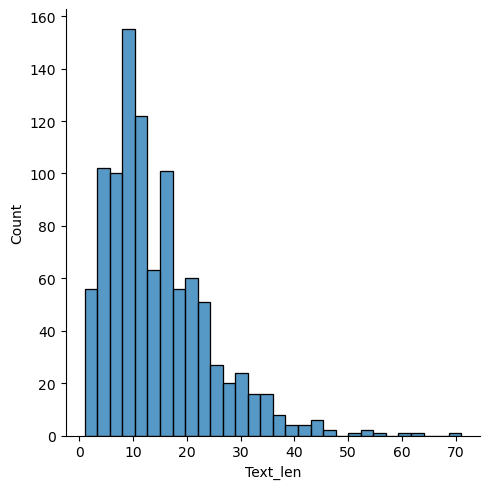

In [521]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [536]:
text = reviews['Text']

text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #print(sentence)
    text1.append(review)


text1[:2]

['slowmoving aimless distressed drift young man',
 'sure lose flat character audience nearly half walk']

In [523]:
text1 = pd.Series(text1)
text1[:2]

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
dtype: object

In [524]:
#remove stop words
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['film','movie', 'get', 'see', 'make', 'one']
stopwords.extend(newStopWords)

#Setting English stopwords
stop_words = set(stopwords)

#text = reviews['Text']
text2 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text2[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0     slowmoving aimless distressed drifting young man
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene gerardo trying find song keeps runn...
dtype: object

In [525]:
#apply lemmatising with POS tags

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer


from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text2.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:2]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        slowmoving aimless distressed drift young man
1    sure lose flat character audience nearly half ...
dtype: object

In [526]:
reviews['Text'] = text3
reviews.head()

,Text,Sentiment,Text_len
0,slowmoving aimless distressed drift young man,0,13
1,sure lose flat character audience nearly half ...,0,19
2,attempt artiness black white clever camera ang...,0,31
3,little music anything speak,0,8
4,best scene gerardo try find song keep run head,1,21


In [527]:
# Create a new column containing the length each review after preprocessing
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

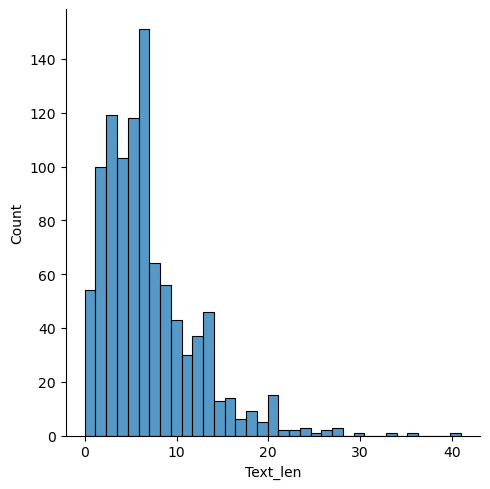

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)


In [587]:
from bertopic import BERTopic


model = BERTopic(
    verbose=True,
    embedding_model='paraphrase-MiniLM-L3-v2', 
    nr_topics=10
)

topics, probs = model.fit_transform(reviews['Text']) 

# --- display topics ---
print(model.get_topic_info()) 

for i in range(10):
    print(f"\nTopic {i}:")
    try:
        print(model.get_topic(i))
    except:
        print("no such topic")

2026-01-20 19:15:17,418 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 32/32 [00:01<00:00, 22.25it/s]
2026-01-20 19:15:20,634 - BERTopic - Embedding - Completed ✓
2026-01-20 19:15:20,635 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-20 19:15:22,234 - BERTopic - Dimensionality - Completed ✓
2026-01-20 19:15:22,235 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-20 19:15:22,256 - BERTopic - Cluster - Completed ✓
2026-01-20 19:15:22,256 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2026-01-20 19:15:22,301 - BERTopic - Representation - Completed ✓
2026-01-20 19:15:22,301 - BERTopic - Topic reduction - Reducing number of topics
2026-01-20 19:15:22,307 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-20 19:15:22,336 - BERTopic - Representation - Completed ✓
2026-01-20 19:15:22,338 - BERTopic - Topic reduction - Redu

   Topic  Count                                     Name  \
0     -1    394              -1_bad_didnt_character_work   
1      0    239                 0_actor_like_watch_movie   
2      1    123             1_love_funny_recommend_great   
3      2    123                 2_bad_act_awful_dialogue   
4      3     39                 3_waste_boring_time_dont   
5      4     24                4_music_song_sound_effect   
6      5     20                   5_plot_every_line_hole   
7      6     15             6_never_forget_cease_meaning   
8      7     12  7_psychological_sense_attention_attempt   
9      8     11                   8_script_flaw_hole_big   

                                      Representation  \
0  [bad, didnt, character, work, good, scene, eve...   
1  [actor, like, watch, movie, film, character, w...   
2  [love, funny, recommend, great, good, really, ...   
3  [bad, act, awful, dialogue, stupid, say, even,...   
4  [waste, boring, time, dont, money, trash, garb...   
5  

In [588]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
# freq.head()

Number of topics: 10


In [589]:
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,394,-1_bad_didnt_character_work,"[bad, didnt, character, work, good, scene, eve...",[use slowmotion needlessly repeat throughout w...
1,0,239,0_actor_like_watch_movie,"[actor, like, watch, movie, film, character, w...",[tom wilkinson character man prepared ordeal b...
2,1,123,1_love_funny_recommend_great,"[love, funny, recommend, great, good, really, ...","[funny, funny, love]"
3,2,123,2_bad_act_awful_dialogue,"[bad, act, awful, dialogue, stupid, say, even,...","[bad, act bad, bad character bad story bad act]"
4,3,39,3_waste_boring_time_dont,"[waste, boring, time, dont, money, trash, garb...","[havent see dont waste time, waste time, dont ..."
5,4,24,4_music_song_sound_effect,"[music, song, sound, effect, speak, soundtrack...",[technically well make impressive camerawork s...
6,5,20,5_plot_every_line_hole,"[plot, every, line, hole, doesnt, much, way, g...",[secondary plot line incomprehensible relation...
7,6,15,6_never_forget_cease_meaning,"[never, forget, cease, meaning, wont, nothing,...",[give meaning phrase never history human confl...
8,7,12,7_psychological_sense_attention_attempt,"[psychological, sense, attention, attempt, try...",[constantine give everything right intensity s...
9,8,11,8_script_flaw_hole_big,"[script, flaw, hole, big, know, write, finish,...","[script big flaw mess, script look rough draft..."


In [590]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

# all topic frequencies
freq = model.get_topic_info()


print("all topic frequencies:")
for i in range(len(freq)):
    topic_id = freq.iloc[i]["Topic"]
    
    topic_words = model.get_topic(topic_id) 
    
    if topic_words: 
        print(f"\nTopic {topic_id}:")
        print(topic_words[:5])

all topic frequencies:

Topic -1:
[('bad', 0.02170311897334403), ('didnt', 0.02156675423940129), ('character', 0.02116149349572942), ('work', 0.019424814786804006), ('good', 0.018750456272777074)]

Topic 0:
[('actor', 0.0377658854247955), ('like', 0.03699826277711619), ('watch', 0.03580197418770219), ('movie', 0.03545530264283538), ('film', 0.03425992653463977)]

Topic 1:
[('love', 0.11771325480809178), ('funny', 0.10703947574443949), ('recommend', 0.0892757923910587), ('great', 0.06362634911084206), ('good', 0.05229633489694008)]

Topic 2:
[('bad', 0.12128397482174198), ('act', 0.07358419092881256), ('awful', 0.06015081343261995), ('dialogue', 0.05569507199262661), ('stupid', 0.054682557666018136)]

Topic 3:
[('waste', 0.2543015492134268), ('boring', 0.1684496095677444), ('time', 0.14217416873859404), ('dont', 0.11412630389257834), ('money', 0.08175405896648509)]

Topic 4:
[('music', 0.19550207937678443), ('song', 0.13929492311709976), ('sound', 0.07959709892405702), ('effect', 0.0756

In [591]:
model.visualize_barchart(top_n_topics=10 ,n_words=9)

In [592]:
model.visualize_topics()

In [599]:
topic_info = model.get_topic_info()

print(f"{'Topic':<6} {'Count':<6} {'Name':<30} {'Top Words'}")
print("-" * 100)

for index, row in topic_info.iterrows():
    topic_id = row['Topic']
    count = row['Count']
    name = row['Name']
    
    keywords = model.get_topic(topic_id)
    
    if keywords:
        top_words_list = [word for word, score in keywords[:10]] 
        top_words_str = ", ".join(top_words_list)
        
        print(f"{topic_id:<6} {count:<6} {name[:30]:<30} {top_words_str}")


Topic  Count  Name                           Top Words
----------------------------------------------------------------------------------------------------
-1     394    -1_bad_didnt_character_work    bad, didnt, character, work, good, scene, even, much, act, really
0      239    0_actor_like_watch_movie       actor, like, watch, movie, film, character, well, cast, good, great
1      123    1_love_funny_recommend_great   love, funny, recommend, great, good, really, worth, give, fun, definitely
2      123    2_bad_act_awful_dialogue       bad, act, awful, dialogue, stupid, say, even, terrible, thing, well
3      39     3_waste_boring_time_dont       waste, boring, time, dont, money, trash, garbage, ever, see, shelf
4      24     4_music_song_sound_effect      music, song, sound, effect, speak, soundtrack, subject, impressive, score, emotion
5      20     5_plot_every_line_hole         plot, every, line, hole, doesnt, much, way, go, mystify, astonishingly
6      15     6_never_forget_cea

In [597]:
from sentence_transformers import SentenceTransformer   
from umap import UMAP 

docs = reviews.Text 
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode( docs, show_progress_bar = False) 

topic_model = BERTopic().fit(docs,embeddings)
model.visualize_documents(docs , embeddings=embeddings)